# 💼 Advanced Data Analysis Assignment: 

## 📦 1. Setup

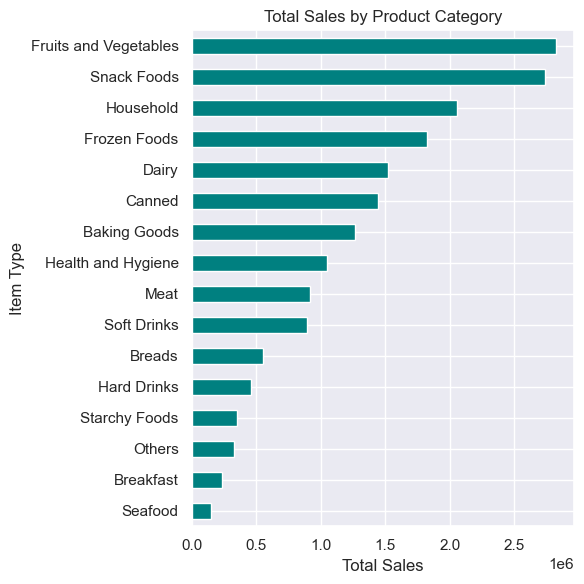

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('big_mart_sales.csv')
df.head()
sns.set(style='darkgrid')
plt.figure(figsize=(6,6))
category_sales = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values()
category_sales.plot(kind='barh', color='teal')
plt.title('Total Sales by Product Category')
plt.xlabel('Total Sales')
plt.ylabel('Item Type')
plt.tight_layout()
plt.show()

---
## 🧠 Scenario 1: Complex Filtering with Multiple Conditions

### Problem Statement:
Find items where:
- Sales are above 90th percentile
- Item_MRP is within 10% of its mean
- Item_Visibility is below median

# TODO: Implement combined filtering using quantiles, np.isclose, and boolean indexing

## Sales are above 90th percentile

In [198]:
#Calculate necessary statistics
sales_90th = df['Item_Outlet_Sales'].quantile(0.90)
mrp_mean = df['Item_MRP'].mean()
visibility_median = df['Item_Visibility'].median()

## Item_MRP is within 10% of its mean

In [201]:
condition_sales = df['Item_Outlet_Sales'] > sales_90th
condition_mrp = np.isclose(df['Item_MRP'], mrp_mean, rtol=0.10)  # within ±10% of mean
condition_visibility = df['Item_Visibility'] < visibility_median

## Item_Visibility is below median

In [204]:
filtered_df = df[condition_sales & condition_mrp & condition_visibility]

# Step 4: Display results
print("Filtered items based on complex conditions:")
print(filtered_df[['Item_Identifier', 'Item_Outlet_Sales', 'Item_MRP', 'Item_Visibility']])

Filtered items based on complex conditions:
     Item_Identifier  Item_Outlet_Sales  Item_MRP  Item_Visibility
54             NCP18          4815.0656  151.4708         0.028760
844            FDV01          6515.5188  154.6314         0.000000
1173           FDH57          5404.9644  131.4284         0.035574
2355           FDR15          4653.9420  153.1314         0.033432
2863           FDS16          5273.1360  145.2760         0.000000
3234           NCR50          7503.5660  153.5340         0.011763
3543           FDQ33          4815.0656  151.6708         0.000000
3726           FDB58          4821.7236  143.7154         0.013431
3825           FDK32          5031.4506  152.8682         0.048738
3832           DRF27          5053.4220  152.2340         0.028461
3866           NCP05          6072.0960  152.6024         0.025164
4013           FDG14          4857.6768  150.9024         0.050256
4600           FDE08          4602.6754  147.7734         0.049081
4676           DRE

---
## 📈 Scenario 2: Custom Aggregation Functions

### Problem Statement:
Group data by `Outlet_Type` and calculate:
- Mean, Std Dev of Sales
- 25th and 75th percentiles
- Count of high selling products (>5000)

### ✍️ Your Task:

## Mean, Std Dev of Sales

In [210]:
sales_summary = df.groupby('Outlet_Type')['Item_Outlet_Sales'].agg(
    Mean_Sales='mean',
    Std_Dev_Sales='std'
).reset_index()
print("Mean & Std Dev of Sales:\n", sales_summary)

Mean & Std Dev of Sales:
          Outlet_Type   Mean_Sales  Std_Dev_Sales
0      Grocery Store   339.828500     260.851582
1  Supermarket Type1  2316.181148    1515.965558
2  Supermarket Type2  1995.498739    1375.932889
3  Supermarket Type3  3694.038558    2127.760054


## 25th and 75th percentiles

In [213]:
percentile_summary = df.groupby('Outlet_Type')['Item_Outlet_Sales'].agg(
    P25_Sales=lambda x: np.percentile(x, 25),
    P75_Sales=lambda x: np.percentile(x, 75)
).reset_index()
print("25th & 75th Percentiles:\n", percentile_summary)

25th & 75th Percentiles:
          Outlet_Type   P25_Sales   P75_Sales
0      Grocery Store   153.79980   458.73620
1  Supermarket Type1  1151.16820  3135.91800
2  Supermarket Type2   981.55565  2702.64865
3  Supermarket Type3  2044.33890  4975.52340


## Count of high selling products (>5000)

In [216]:
high_seller_summary = df.groupby('Outlet_Type')['Item_Outlet_Sales'].agg(
    High_Seller_Count=lambda x: (x > 5000).sum()
).reset_index()
print("High Selling Products (>5000 Sales):\n", high_seller_summary)

High Selling Products (>5000 Sales):
          Outlet_Type  High_Seller_Count
0      Grocery Store                  0
1  Supermarket Type1                359
2  Supermarket Type2                 39
3  Supermarket Type3                231


---
## 🧪 Scenario 3: Row-wise Operations and Conditional Tagging

### Problem Statement:
Tag each row as:
- 'High Performer' if Sales > 90th percentile AND Item_MRP > 75th percentile
- 'Average' otherwise

### ✍️ Your Task:

## 'High Performer' if Sales > 90th percentile AND Item_MRP > 75th percentile

In [222]:
import numpy as np
import pandas as pd

# Ensure numeric columns are properly typed
df['Item_Outlet_Sales'] = pd.to_numeric(df['Item_Outlet_Sales'], errors='coerce')
df['Item_MRP'] = pd.to_numeric(df['Item_MRP'], errors='coerce')

# Compute percentiles for sales and MRP
sales_90th = df['Item_Outlet_Sales'].quantile(0.90)
mrp_75th = df['Item_MRP'].quantile(0.75)

print(f"90th Percentile Sales: {sales_90th}")
print(f"75th Percentile MRP: {mrp_75th}")

90th Percentile Sales: 4570.0512
75th Percentile MRP: 185.6437


## Average

In [225]:
# Define conditions and choices for tagging
conditions = [
    (df['Item_Outlet_Sales'] > sales_90th) & (df['Item_MRP'] > mrp_75th)
]
choices = ['High Performer']

# Create Performance_Tag column
df['Performance_Tag'] = np.select(conditions, choices, default='Average')

# Save the updated DataFrame to a CSV file (optional)
df.to_csv('tagged_big_mart_sales.csv', index=False)

# Display tag counts
print(df['Performance_Tag'].value_counts())

Performance_Tag
Average           7911
High Performer     612
Name: count, dtype: int64


---
## 🧵 Scenario 4: Pivot Table & Reshaping

### Problem Statement:
Create a pivot table showing average `Item_Outlet_Sales` by `Item_Type` and `Outlet_Type`.
Then, unstack the result and fill missing values with 0.

### ✍️ Your Task:

In [230]:
# Ensure the 'Item_Outlet_Sales' column is numeric
df['Item_Outlet_Sales'] = pd.to_numeric(df['Item_Outlet_Sales'], errors='coerce')
# Create the pivot table: average Item_Outlet_Sales by Item_Type and Outlet_Type
pivot_table = pd.pivot_table(
    df,
    values='Item_Outlet_Sales',
    index='Item_Type',
    columns='Outlet_Type',
    aggfunc='mean'
)
# Unstack the result and fill missing values with 0
pivot_table_unstacked = pivot_table.unstack().fillna(0)
# Optional: Save the result to a CSV file
pivot_table_unstacked.to_csv('pivot_unstacked_sales.csv')
# Display the result
print(pivot_table_unstacked)

Outlet_Type        Item_Type    
Grocery Store      Baking Goods      292.082544
                   Breads            381.967442
                   Breakfast         412.831042
                   Canned            352.864879
                   Dairy             341.866589
                                       ...     
Supermarket Type3  Others           2700.928667
                   Seafood          2687.073686
                   Snack Foods      3745.168739
                   Soft Drinks      3284.938836
                   Starchy Foods    3512.190114
Length: 64, dtype: float64


---
## 🪜 Scenario 5: Memory Optimization and Dtype Inference

### Problem Statement:
- Find top 5 columns with largest memory usage
- Optimize their datatypes (e.g., float32 instead of float64)
- Calculate memory usage before and after

### ✍️ Your Task:

In [235]:
# TODO: Use df.memory_usage(), convert dtypes, compare usage

In [237]:
# Step 1: Calculate initial memory usage
initial_memory = df.memory_usage(deep=True).sort_values(ascending=False)
top_5_memory_columns = initial_memory.head(13)

# Step 2: Attempt dtype optimization for the top 5 memory-heavy columns
df_optimized = df.copy()
for col in top_5_memory_columns.index:
    if df_optimized[col].dtype == 'float64':
        df_optimized[col] = df_optimized[col].astype('float32')
    elif df_optimized[col].dtype == 'int64':
        df_optimized[col] = df_optimized[col].astype('int32')
    elif df_optimized[col].dtype == 'object':
        num_unique_values = df_optimized[col].nunique()
        num_total_values = len(df_optimized[col])
        if num_unique_values / num_total_values < 0.5:
            df_optimized[col] = df_optimized[col].astype('category')

# Step 3: Calculate memory usage after optimization
optimized_memory = df_optimized.memory_usage(deep=True).sort_values(ascending=False)
memory_comparison = pd.DataFrame({
    'Before (Bytes)': initial_memory,
    'After (Bytes)': optimized_memory,
    'Reduced (Bytes)': initial_memory - optimized_memory
}).loc[top_5_memory_columns.index]

memory_comparison

,Before (Bytes),After (Bytes),Reduced (Bytes)
Outlet_Type,558186,8955,549231
Item_Type,514432,10024,504408
Performance_Tag,481572,8750,472822
Item_Fat_Content,475240,8966,466274
Outlet_Identifier,468765,9373,459392
Outlet_Location_Type,468765,8796,459969
Item_Identifier,460242,134296,325946
Outlet_Size,409083,8793,400290
Item_Weight,68184,34092,34092
Item_Visibility,68184,34092,34092


---
## 🌀 Scenario 6: MultiIndex Operations

### Problem Statement:
Set a multi-index with `Outlet_Identifier` and `Item_Type`.
Then, retrieve all rows for OUT049 and all Dairy products.

### ✍️ Your Task:

In [242]:
# TODO: Use .set_index() and .loc[] to extract multi-indexed slices

In [244]:
#Set a multi-index using Outlet_Identifier and Item_Type
df_multi = df.set_index(['Outlet_Identifier', 'Item_Type'])

#Retrieve all rows for Outlet_Identifier 'OUT049'
out049_rows = df_multi.loc['OUT049']

#Retrieve all rows for Item_Type 'Dairy'
dairy_rows = df_multi.xs('Dairy', level='Item_Type')

#Display some sample output
print("All rows for OUT049:")
print(out049_rows.head())

print("\nAll rows for Item_Type = 'Dairy':")
print(dairy_rows.head())

All rows for OUT049:
                      Item_Identifier  Item_Weight Item_Fat_Content  \
Item_Type                                                             
Dairy                           FDA15          9.3          Low Fat   
Meat                            FDN15         17.5          Low Fat   
Fruits and Vegetables           FDY07         11.8          Low Fat   
Fruits and Vegetables           FDX32         15.1          Regular   
Breakfast                       FDP49          9.0          Regular   

                       Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
Item_Type                                                                     
Dairy                         0.016047  249.8092                       1999   
Meat                          0.016760  141.6180                       1999   
Fruits and Vegetables         0.000000   45.5402                       1999   
Fruits and Vegetables         0.100014  145.4786                       1999   
Breakfa

---
## 🔁 Scenario 7: Exploding Lists and Normalizing Nested Structures

### Problem Statement:
Assume a column contains lists of promo tags like ['summer', 'festival'].
Explode the list into separate rows.

### ✍️ Your Task:

In [249]:
# TODO: Simulate a column with lists and use .explode() to normalize

In [251]:
data = {
    'Item_Identifier': ['FDA15', 'DRC01', 'FDN15'],
    'Promo_Tags': [['summer', 'festival'], ['clearance'], ['summer', 'new_arrival', 'online']]
}

df = pd.DataFrame(data)

#to normalize the Promo_Tags list into separate rows
df_exploded = df.explode('Promo_Tags')

# Display the exploded DataFrame
print(df_exploded)

  Item_Identifier   Promo_Tags
0           FDA15       summer
0           FDA15     festival
1           DRC01    clearance
2           FDN15       summer
2           FDN15  new_arrival
2           FDN15       online


In [263]:
import pandas as pd

# ✅ Step 1: Simulate a sample dataset with a list column
data = {
    'Item_Identifier': ['FDA15', 'DRC01', 'FDN15'],
    'Promo_Tags': [['summer', 'festival'], ['clearance'], ['summer', 'new_arrival', 'online']]
}
df = pd.DataFrame(data)

# ✅ Step 2: Check initial shape and nulls
print("Before explode:")
print(f"Shape: {df.shape}")
print("Nulls:\n", df.isnull().sum())

# ✅ Step 3: Explode the Promo_Tags list into separate rows
df_exploded = df.explode('Promo_Tags')

# ✅ Step 4: Validate the transformation
print("\nAfter explode:")
print(f"Shape: {df_exploded.shape}")
print("Nulls:\n", df_exploded.isnull().sum())

Before explode:
Shape: (3, 2)
Nulls:
 Item_Identifier    0
Promo_Tags         0
dtype: int64

After explode:
Shape: (6, 2)
Nulls:
 Item_Identifier    0
Promo_Tags         0
dtype: int64


---
## 🧩 Final Thoughts:
Make sure to:
- Comment your logic clearly
- Validate shapes and nulls after operations
- Avoid chained indexing

In [254]:
print("✅ Great job! Submit your completed .ipynb file.")

✅ Great job! Submit your completed .ipynb file.
